In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
# Function to load and preprocess dataset
def load_and_preprocess(filepath):
    """Loads dataset, removes unnecessary columns, and converts target variable into binary classification."""
    df = pd.read_csv(filepath)

    # Dropping irrelevant column
    if 'Id' in df.columns:
        df.drop(columns=['Id'], inplace=True)

    # Converting wine quality into binary labels (1 = Good, 0 = Not Good)
    df['Quality'] = np.where(df['quality'] >= 7, 1, 0)
    df.drop(columns=['quality'], inplace=True)

    return df
    

In [5]:
# Function to split dataset into training and testing sets
def split_data(df, test_ratio=0.2, random_state=42):
    """Splits dataset into features and target variable, then divides it into training and testing sets."""
    X = df.drop(columns=['Quality'])
    y = df['Quality']
    return train_test_split(X, y, test_size=test_ratio, random_state=random_state)

In [6]:
# Function to train the decision tree model
def train_decision_tree(X_train, y_train, max_depth=5, criterion='gini'):
    """Trains a Decision Tree Classifier using the specified parameters."""
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model

In [7]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    """Predicts on test data and calculates various performance metrics."""
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    return metrics, y_pred

In [8]:
# Function to visualize decision tree and confusion matrix
def visualize_results(model, feature_names, conf_matrix):
    """Plots the decision tree and confusion matrix heatmap."""
    # Decision tree visualization
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=feature_names, class_names=['Not Good', 'Good'], filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()

    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [9]:
# Load and preprocess data
data = load_and_preprocess('WineQT - WineQT.csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(data)


In [10]:
# Train decision tree model
classifier = train_decision_tree(X_train, y_train)

# Evaluate model
metrics, y_pred = evaluate_model(classifier, X_test, y_test)


In [ ]:
# Print performance metrics
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")          
    else:
        print(f"{metric}:\n{value}")


Model Performance Metrics:
Accuracy: 0.89
Precision: 0.53
Recall: 0.57
F1 Score: 0.55
Confusion Matrix:
[[187  14]
 [ 12  16]]


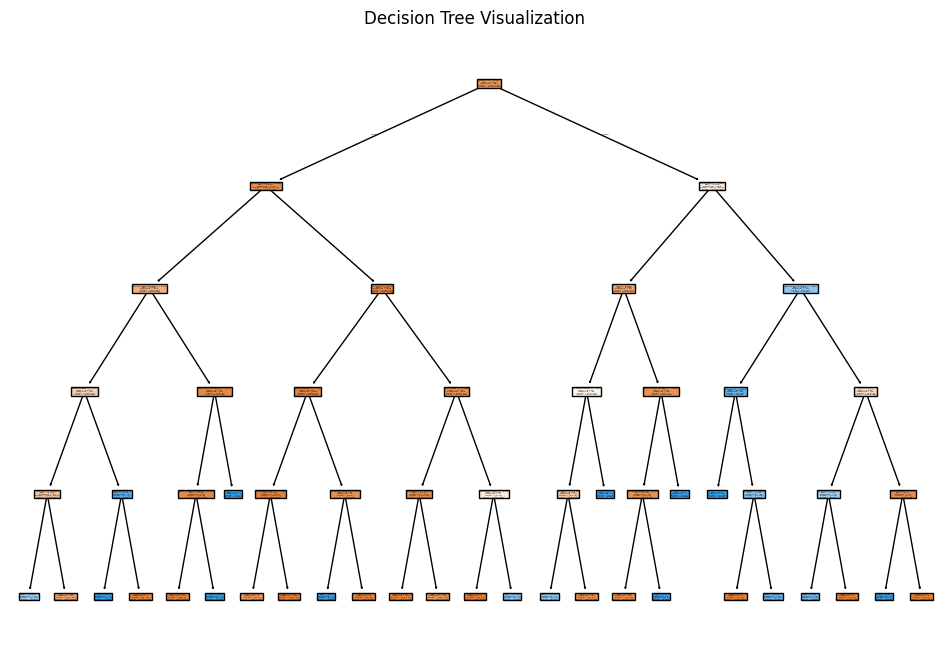

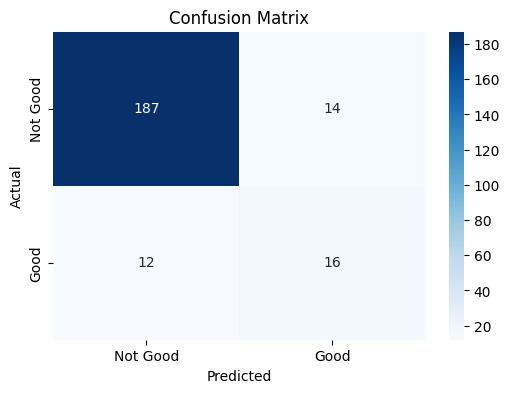

In [10]:
# Visualize results
visualize_results(classifier, X_train.columns, metrics['Confusion Matrix'])